1. Бизнес-цель: pазделить клиентов на группы для предложения им справедливой цены за страховку

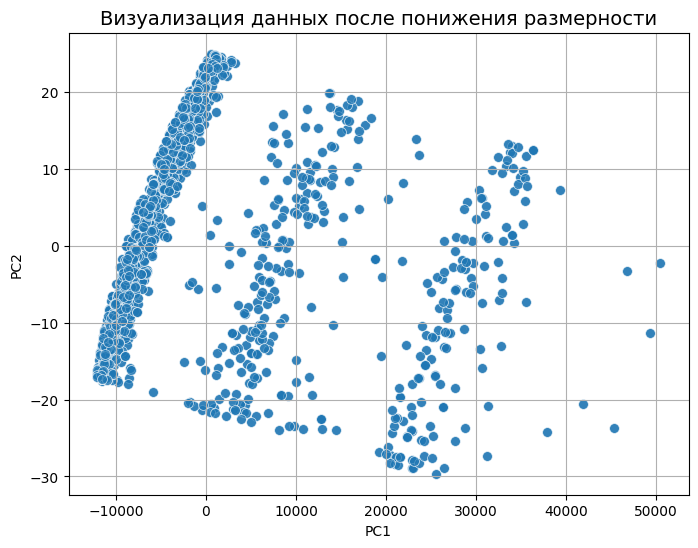

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../dataset.csv")

label_encoders = {}
for column in ['sex', 'smoker', 'region']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


reduced_data = PCA(n_components=2).fit_transform(data)

pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=50, alpha=0.7)
plt.title('Визуализация данных после понижения размерности', fontsize=14)
plt.grid(True)
plt.show()


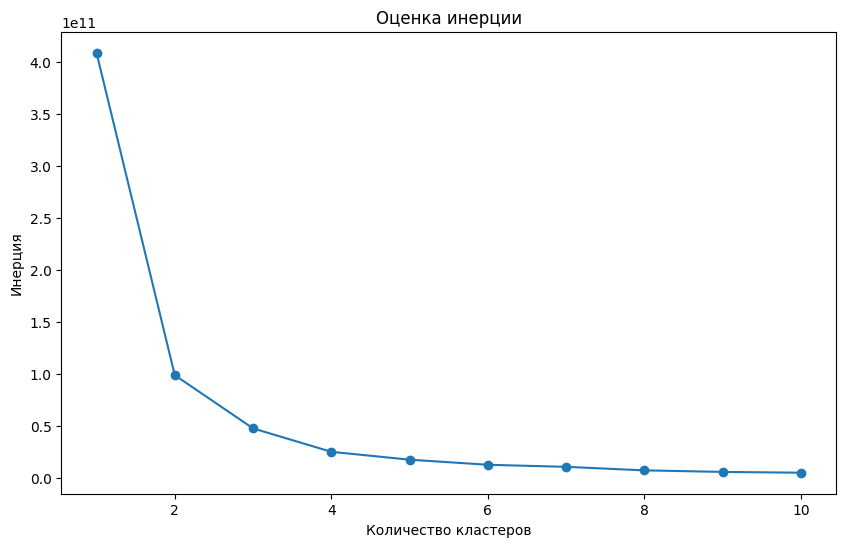

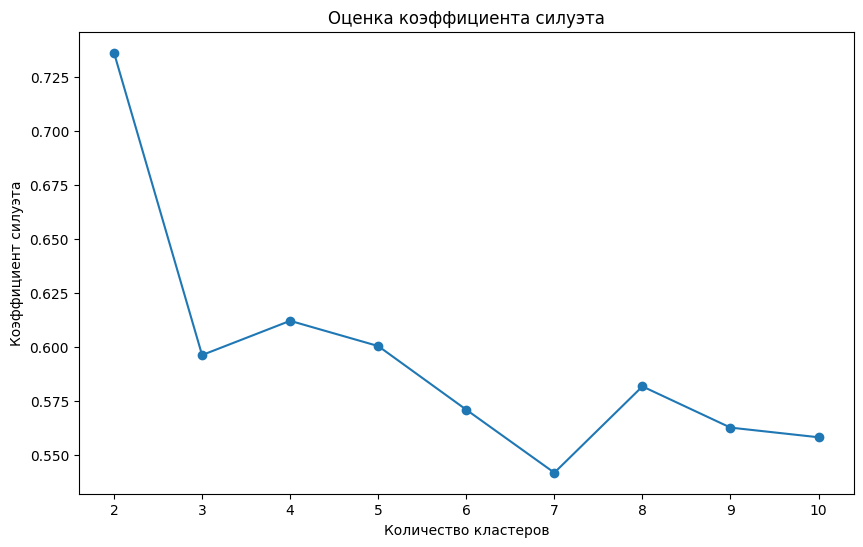

In [39]:
# Оценка инерции
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Оценка инерции')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

# Оценка коэффициента силуэта
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    score = silhouette_score(reduced_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Оценка коэффициента силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.show()

Оптимальным решением будет взять четыре кластера. Хотя коэффиуиент силуета максимален при двух кластерах, при четырех от все еще высок и при этом на четырех кластерах виден "локоть" на графике оценки инерции

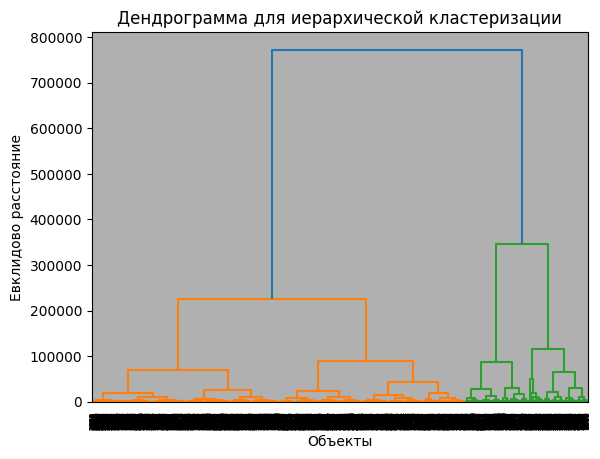

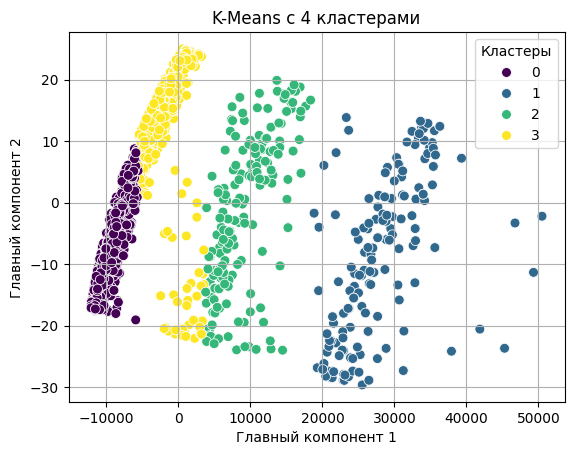

In [40]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
optimal_k = 4
# Иерархический
dendrogram = sch.dendrogram(sch.linkage(reduced_data, method='ward'))
plt.title('Дендрограмма для иерархической кластеризации')
plt.xlabel('Объекты')
plt.ylabel('Евклидово расстояние')
plt.grid(True)
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
clusters_hierarchical = hierarchical.fit_predict(reduced_data)

# Неиерархический
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(reduced_data)

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters_kmeans, palette='viridis', s=50)
plt.title(f"K-Means с {optimal_k} кластерами")
plt.xlabel("Главный компонент 1")
plt.ylabel("Главный компонент 2")
plt.legend(title="Кластеры")
plt.grid(True)
plt.show()

In [41]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Оценка качества для K-Means
silhouette_kmeans = silhouette_score(reduced_data, clusters_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(reduced_data, clusters_kmeans)

print("Качество кластеризации для K-Means:")
print(f"Коэффициент силуэта: {silhouette_kmeans:.4f}")
print(f"Коэффициент Дэвиса-Болдина: {davies_bouldin_kmeans:.4f}\n")

# Оценка качества для агломеративной кластеризации
silhouette_hierarchical = silhouette_score(reduced_data, clusters_hierarchical)
davies_bouldin_hierarchical = davies_bouldin_score(reduced_data, clusters_hierarchical)

print("Качество кластеризации для агломеративной кластеризации:")
print(f"Коэффициент силуэта: {silhouette_hierarchical:.4f}")
print(f"Коэффициент Дэвиса-Болдина: {davies_bouldin_hierarchical:.4f}")

Качество кластеризации для K-Means:
Коэффициент силуэта: 0.6121
Коэффициент Дэвиса-Болдина: 0.4656

Качество кластеризации для агломеративной кластеризации:
Коэффициент силуэта: 0.6077
Коэффициент Дэвиса-Болдина: 0.4677
